Deploying the ML model usign Stramlit.

In [20]:
# Importing relevand libraries and Dataset
import pandas as pd
import numpy as np

DF = pd.read_csv("banknote-authentication.csv")
DF.tail()

,variance,skew,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


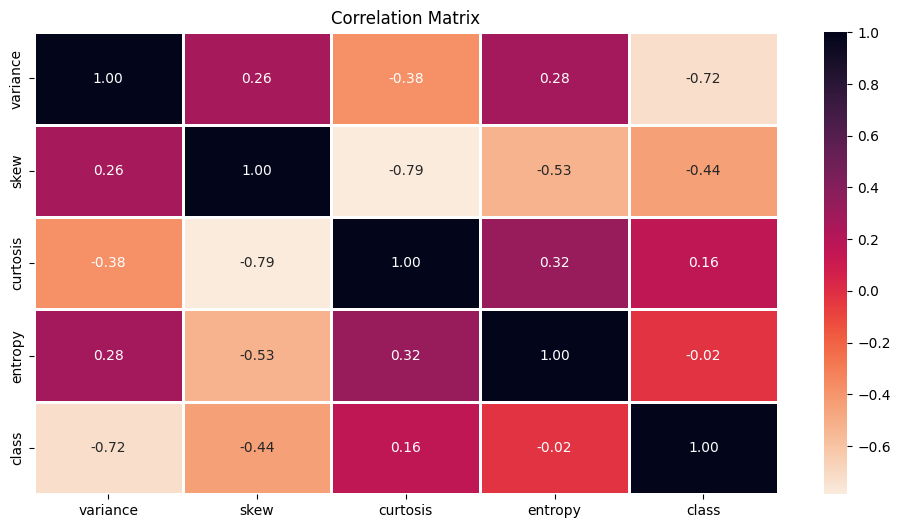

In [21]:
#Let's check the correlation matrix to better understand the dataset how to train the model
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (12,6))
sns.heatmap(DF.corr(),
            annot = True,
            cmap = 'rocket_r',
            linewidth = 2,
            fmt ='.2f'
            )
plt.title("Correlation Matrix")
plt.show()

<ipython-input-22-15d40ba81241>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,index)
<ipython-input-22-15d40ba81241>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(DF[i].values)
<ipython-input-22-15d40ba81241>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use

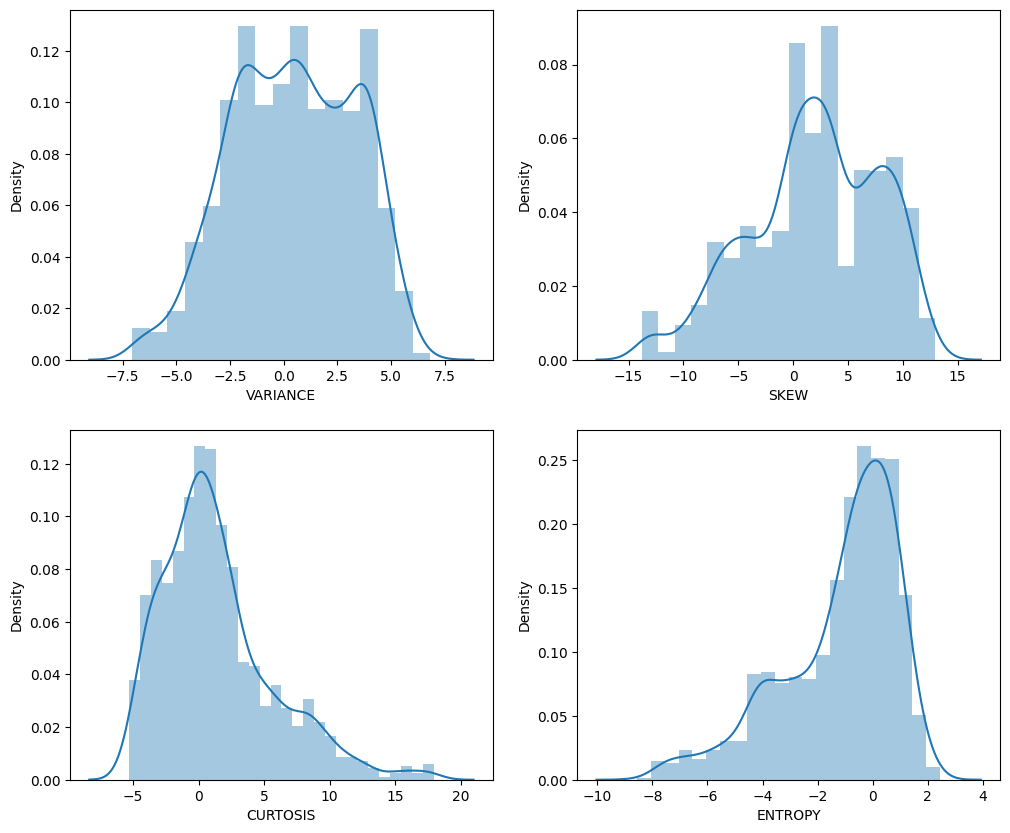

In [22]:
#Creating a Distribution plot as well to understant the DB better
index = 1
plt.subplots(figsize = (12,10))
index = 1
List = ['variance', 'skew', 'curtosis', 'entropy']

for i in List:
  plt.subplot(2,2,index)
  sns.distplot(DF[i].values)
  plt.xlabel(i.upper())
  plt.plot()
  index+=1

In [23]:
X = DF.iloc[:, 0:4].values
Y = DF.iloc[:, 4:5].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Training a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
CLS = RandomForestClassifier()
CLS.fit(x_train, y_train)


y_pred = CLS.predict(x_test)
from sklearn import metrics
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy *100


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


99.27272727272727

In [37]:
CLS.predict([[0.40614,	1.34920,	-1.4501,	-0.55949]])

array([1])

In [25]:
# Now exporting the trained Model Using Pickle
import pickle
pickle_out = open('BankNote_ML.pkl', "wb")
pickle.dump(CLS, pickle_out)
pickle_out.close()

Implementing PCA in Python with Sklearn

What is PCA?
Ans. Prinicpal component analysis, is the way to address high dimensionality of the data. Used for better Data visualization and improving accuracy of the model.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.datasets import load_breast_cancer
Data = load_breast_cancer()
Data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [40]:
print(Data['target_names'])
print(Data['feature_names'])

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [45]:
DF1 = pd.DataFrame(Data['data'], columns = Data['feature_names'])
DF1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(DF1)
# X = scaler.transform(DF1)

principal = PCA(n_components = 3)
# principal.fit(X)
XY = principal.fit_transform(X)
print(XY.shape)

(569, 3)


In [81]:
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947],
       [-0.00853124,  0.0645499 , -0.00931422,  0.02869953, -0.1042919 ,
        -0.07409157,  0.00273384, -0.02556354, -0

Text(0, 0.5, 'PC2')

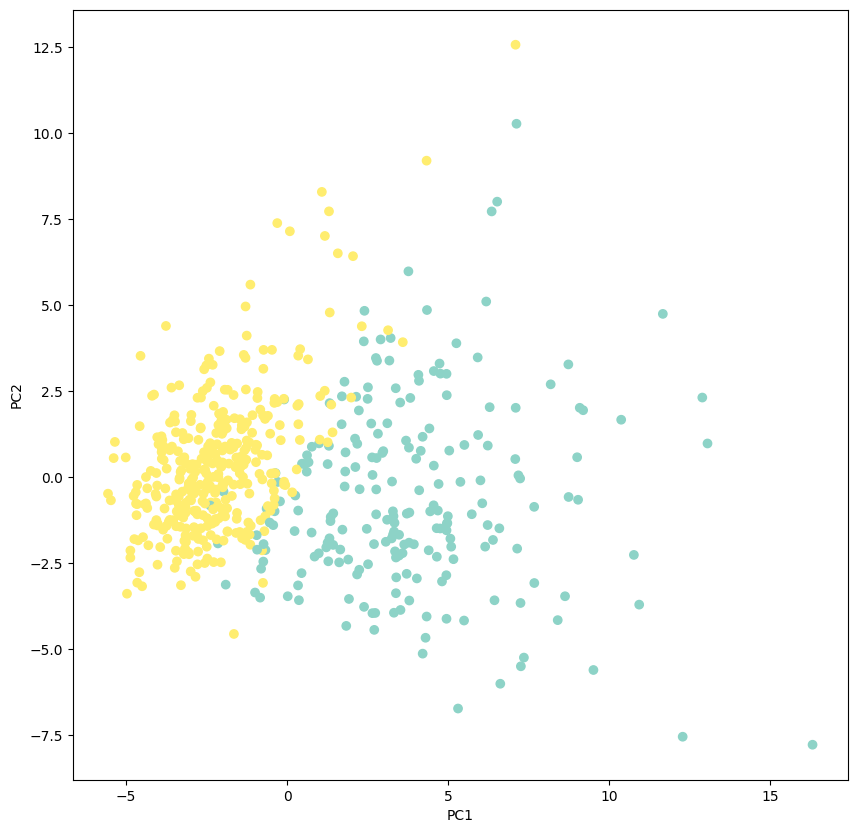

In [74]:
# plot the graph for PCA
plt.figure(figsize = (10,10))
plt.scatter(XY[:,0], XY[:,1], c = Data['target'], cmap= "Set3")
plt.xlabel('PC1')
plt.ylabel('PC2')

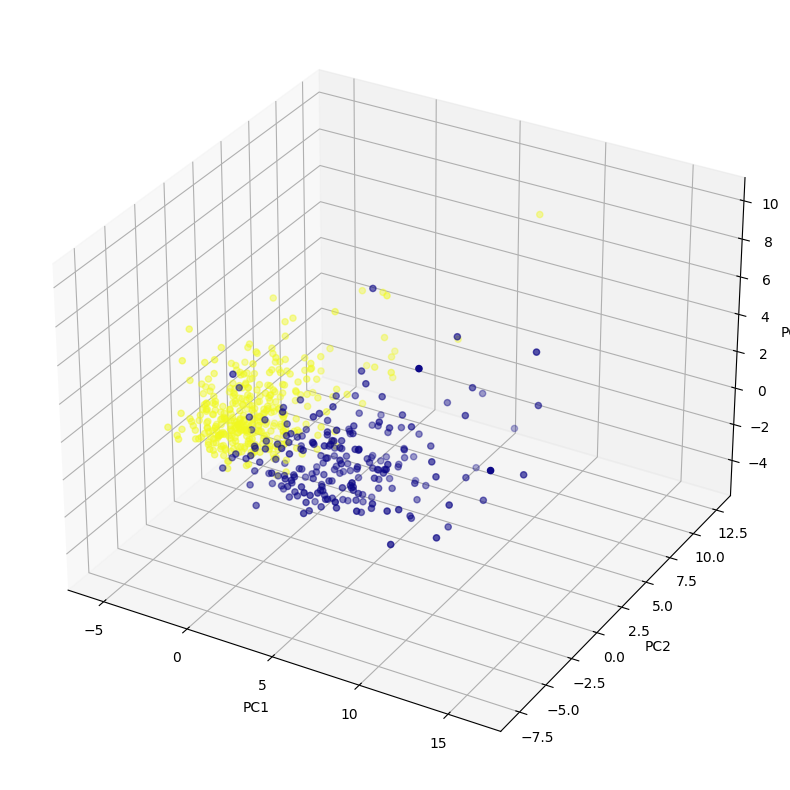

In [93]:
# for 3 components we need to plot a 3D graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10,10))
axis = fig.add_subplot(111, projection= '3d')
axis.scatter(XY[:,0], XY[:,1], XY[:,2], cmap= "plasma", c = Data['target'])
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.show()

In [101]:
print(principal.explained_variance_ratio_)
print(principal.explained_variance_)

[0.44272026 0.18971182 0.09393163]
[13.30499079  5.7013746   2.82291016]


Pipelines in Sckit Learn or ML Model is
1. Gathering the Data
2. Data Pre-processing
3. Training and Testing Data
4. Evaluation

In [102]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

In [107]:
# Gathering the Data
iris = load_iris()
x =iris.data
y = iris.target

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

from sklearn.pipeline import Pipeline
pipe = Pipeline(
    [
        ('PCA', PCA(n_components=2)),
        ('std', StandardScaler()),
        ('decision_tree', DecisionTreeClassifier() )
    ]
    , verbose = True)
pipe.fit(x_train, y_train)
pipe.get_params
# from sklearn.metrics import accuracy_score
# y_pred= pipe.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# accuracy

[Pipeline] ............... (step 1 of 3) Processing PCA, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ..... (step 3 of 3) Processing decision_tree, total=   0.0s


<bound method Pipeline.get_params of Pipeline(steps=[('PCA', PCA(n_components=2)), ('std', StandardScaler()),
                ('decision_tree', DecisionTreeClassifier())],
         verbose=True)>

In [124]:
pipe.named_steps

{'PCA': PCA(n_components=2),
 'std': StandardScaler(),
 'decision_tree': DecisionTreeClassifier()}

In [125]:
pipe.get_params()

{'memory': None,
 'steps': [('PCA', PCA(n_components=2)),
  ('std', StandardScaler()),
  ('decision_tree', DecisionTreeClassifier())],
 'verbose': True,
 'PCA': PCA(n_components=2),
 'std': StandardScaler(),
 'decision_tree': DecisionTreeClassifier(),
 'PCA__copy': True,
 'PCA__iterated_power': 'auto',
 'PCA__n_components': 2,
 'PCA__n_oversamples': 10,
 'PCA__power_iteration_normalizer': 'auto',
 'PCA__random_state': None,
 'PCA__svd_solver': 'auto',
 'PCA__tol': 0.0,
 'PCA__whiten': False,
 'std__copy': True,
 'std__with_mean': True,
 'std__with_std': True,
 'decision_tree__ccp_alpha': 0.0,
 'decision_tree__class_weight': None,
 'decision_tree__criterion': 'gini',
 'decision_tree__max_depth': None,
 'decision_tree__max_features': None,
 'decision_tree__max_leaf_nodes': None,
 'decision_tree__min_impurity_decrease': 0.0,
 'decision_tree__min_samples_leaf': 1,
 'decision_tree__min_samples_split': 2,
 'decision_tree__min_weight_fraction_leaf': 0.0,
 'decision_tree__monotonic_cst': None,